# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [22]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

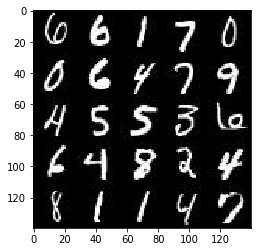

In [23]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

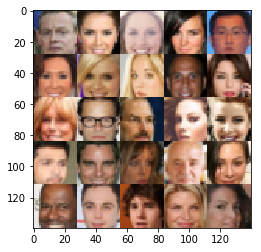

In [24]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [26]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_images = tf.placeholder(tf.float32 , (None , image_width , image_height , image_channels))
    Z = tf.placeholder(tf.float32 , (None , z_dim))
    lr = tf.placeholder(tf.float32  , (None))

    return input_images , Z , lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start\n    self._run_callback(self._callbacks.popleft())', 'File

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [27]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2
    d_dropout=0.2
    with tf.variable_scope('discriminator',reuse=reuse):
        layer0 = tf.layers.conv2d(images , 64 , 5 , strides=2 , padding='same')
        layer0 = tf.maximum(layer0 , alpha*layer0)
        layer0 = tf.nn.dropout(layer0, d_dropout)
        
        layer1 = tf.layers.conv2d(layer0 , 128 , 5 , strides=2 , padding="same")
        layer1 = tf.layers.batch_normalization(layer1 , training=True )
        layer1 = tf.maximum(layer1 , alpha*layer1)
        layer1 = tf.nn.dropout(layer1, d_dropout)
        
        layer2 = tf.layers.conv2d(layer1 , 256 , 5 , strides=2 , padding='same')
        layer2 = tf.layers.batch_normalization(layer2 , training=True)
        layer2 = tf.maximum(layer2 , alpha*layer2)
        layer2 = tf.nn.dropout(layer2, d_dropout)
        
        logits = tf.reshape(layer2 , (-1 , 4*4*256))
        
        logits = tf.layers.dense(logits , 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [28]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha=0.2
    g_dropout=0.2
    with tf.variable_scope('generator', reuse=not is_train):
        layer0 = tf.layers.dense(z, 4*4*512)        
        layer0 = tf.reshape(layer0, (-1,4,4,512))
        layer0 = tf.layers.batch_normalization(layer0, training=is_train)
        layer0 = tf.maximum(layer0, alpha*layer0)
        layer0 = tf.nn.dropout(layer0, g_dropout)
        
        layer1 = tf.layers.conv2d_transpose(layer0, 256 , 4 , strides=1 , padding="valid")
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(layer1, alpha*layer1)
        layer1 = tf.nn.dropout(layer1, g_dropout)
        
        layer2 = tf.layers.conv2d_transpose(layer1, 128 , 4 , strides=2 , padding="same")
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(layer2, alpha*layer2)
        layer2 = tf.nn.dropout(layer2, g_dropout)
        
        logits = tf.layers.conv2d_transpose(layer2, out_channel_dim , 4 , strides=2 , padding="same")
        
        output = tf.tanh(logits)

    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [29]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_output = generator(input_z, out_channel_dim, is_train=True)

    d_output_real, d_logits_real = discriminator(input_real, reuse=False)
    d_output_fake, d_logits_fake = discriminator(g_output, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_real, labels=tf.ones_like(d_output_real) * 0.9))

    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_output_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_output_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [30]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_update_ops = [var for var in update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in update_ops if var.name.startswith('discriminator')]
    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [31]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [32]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    inputs_real , inputs_z , lr = model_inputs(data_shape[1] , data_shape[2] , data_shape[3] , z_dim)
    d_loss , g_loss = model_loss(inputs_real , inputs_z , data_shape[-1])
    d_train_opt , g_train_opt = model_opt(d_loss , g_loss , learning_rate , beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            step = 0
            for batch_images in get_batches(batch_size):
                step += 1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, lr:learning_rate})
                sess.run(g_train_opt, feed_dict={inputs_z: batch_z, lr:learning_rate})
                
                if step % 100 == 0:
                    train_loss_d = d_loss.eval({inputs_z:batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z:batch_z})
                    print("Epoch {}/{} batch {}...".format(epoch_i+1, epoch_count, step),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g))  
                
                if step % 300 == 0:
                    show_generator_output(sess, show_n_images, inputs_z, data_shape[3], data_image_mode)

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2 batch 100... Discriminator Loss: 1.8662... Generator Loss: 1.6935
Epoch 1/2 batch 200... Discriminator Loss: 0.9402... Generator Loss: 2.2567
Epoch 1/2 batch 300... Discriminator Loss: 1.4807... Generator Loss: 0.9722


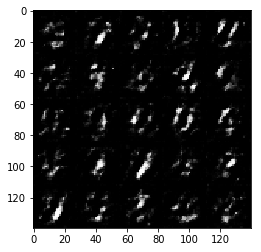

Epoch 1/2 batch 400... Discriminator Loss: 1.5067... Generator Loss: 1.2481
Epoch 1/2 batch 500... Discriminator Loss: 1.4348... Generator Loss: 0.9564
Epoch 1/2 batch 600... Discriminator Loss: 1.3644... Generator Loss: 1.1180


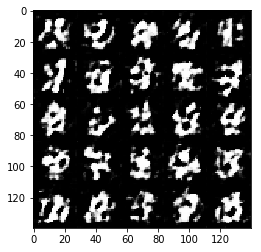

Epoch 1/2 batch 700... Discriminator Loss: 1.3367... Generator Loss: 0.9924
Epoch 1/2 batch 800... Discriminator Loss: 1.4031... Generator Loss: 0.9764
Epoch 1/2 batch 900... Discriminator Loss: 1.3440... Generator Loss: 1.0217


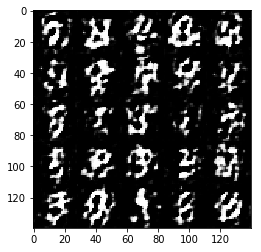

Epoch 2/2 batch 100... Discriminator Loss: 1.2641... Generator Loss: 0.9585
Epoch 2/2 batch 200... Discriminator Loss: 1.1749... Generator Loss: 1.3113
Epoch 2/2 batch 300... Discriminator Loss: 1.2797... Generator Loss: 1.5805


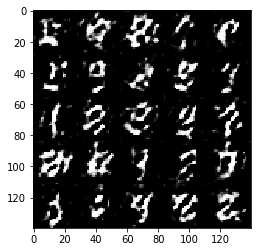

Epoch 2/2 batch 400... Discriminator Loss: 0.7787... Generator Loss: 1.7780
Epoch 2/2 batch 500... Discriminator Loss: 0.8898... Generator Loss: 1.0475
Epoch 2/2 batch 600... Discriminator Loss: 0.8904... Generator Loss: 1.7880


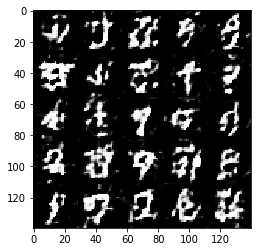

Epoch 2/2 batch 700... Discriminator Loss: 1.0419... Generator Loss: 1.0948
Epoch 2/2 batch 800... Discriminator Loss: 0.7235... Generator Loss: 2.5034
Epoch 2/2 batch 900... Discriminator Loss: 1.7034... Generator Loss: 0.7466


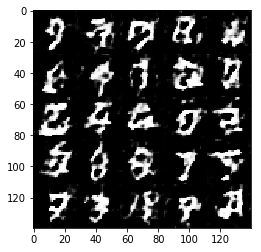

In [33]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/1 batch 100... Discriminator Loss: 0.8054... Generator Loss: 3.8624
Epoch 1/1 batch 200... Discriminator Loss: 0.8534... Generator Loss: 3.8788
Epoch 1/1 batch 300... Discriminator Loss: 0.7046... Generator Loss: 4.5303


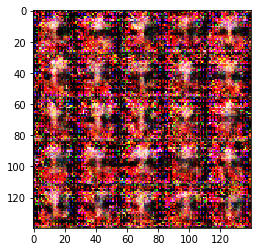

Epoch 1/1 batch 400... Discriminator Loss: 0.5547... Generator Loss: 5.3224
Epoch 1/1 batch 500... Discriminator Loss: 1.0233... Generator Loss: 7.0516
Epoch 1/1 batch 600... Discriminator Loss: 0.8086... Generator Loss: 2.7011


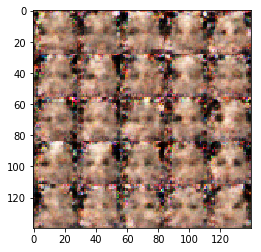

Epoch 1/1 batch 700... Discriminator Loss: 1.3624... Generator Loss: 2.0802
Epoch 1/1 batch 800... Discriminator Loss: 0.7198... Generator Loss: 2.4382
Epoch 1/1 batch 900... Discriminator Loss: 0.6107... Generator Loss: 3.2630


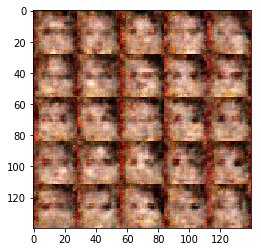

Epoch 1/1 batch 1000... Discriminator Loss: 0.7088... Generator Loss: 3.0728
Epoch 1/1 batch 1100... Discriminator Loss: 1.0799... Generator Loss: 1.6115
Epoch 1/1 batch 1200... Discriminator Loss: 0.6504... Generator Loss: 2.7593


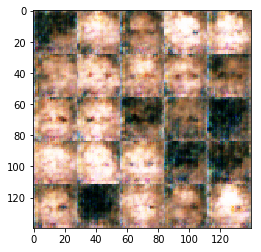

Epoch 1/1 batch 1300... Discriminator Loss: 0.8900... Generator Loss: 2.0392
Epoch 1/1 batch 1400... Discriminator Loss: 1.1743... Generator Loss: 1.3633
Epoch 1/1 batch 1500... Discriminator Loss: 1.0618... Generator Loss: 1.4067


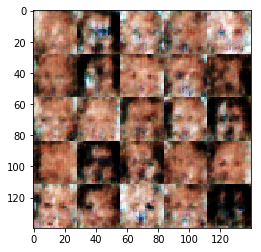

Epoch 1/1 batch 1600... Discriminator Loss: 1.2231... Generator Loss: 1.6008
Epoch 1/1 batch 1700... Discriminator Loss: 1.3042... Generator Loss: 1.5169
Epoch 1/1 batch 1800... Discriminator Loss: 0.8128... Generator Loss: 1.8896


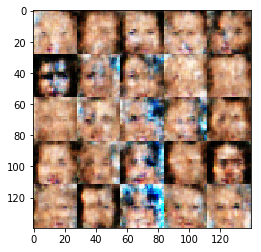

Epoch 1/1 batch 1900... Discriminator Loss: 1.3225... Generator Loss: 1.0537
Epoch 1/1 batch 2000... Discriminator Loss: 1.1261... Generator Loss: 1.4712
Epoch 1/1 batch 2100... Discriminator Loss: 1.5245... Generator Loss: 0.9343


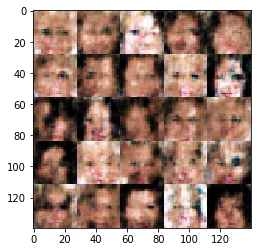

Epoch 1/1 batch 2200... Discriminator Loss: 1.3681... Generator Loss: 0.9540
Epoch 1/1 batch 2300... Discriminator Loss: 1.0436... Generator Loss: 1.4945
Epoch 1/1 batch 2400... Discriminator Loss: 1.0764... Generator Loss: 1.0093


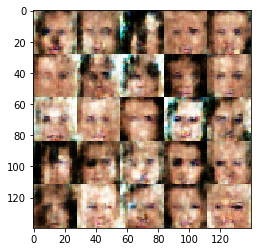

Epoch 1/1 batch 2500... Discriminator Loss: 0.9641... Generator Loss: 1.5614
Epoch 1/1 batch 2600... Discriminator Loss: 1.1519... Generator Loss: 1.5355
Epoch 1/1 batch 2700... Discriminator Loss: 1.1785... Generator Loss: 1.2098


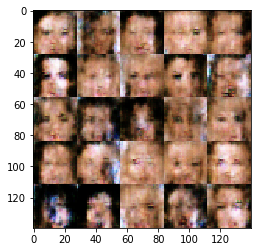

Epoch 1/1 batch 2800... Discriminator Loss: 1.1891... Generator Loss: 0.7854
Epoch 1/1 batch 2900... Discriminator Loss: 0.9444... Generator Loss: 1.0730
Epoch 1/1 batch 3000... Discriminator Loss: 0.9175... Generator Loss: 1.6664


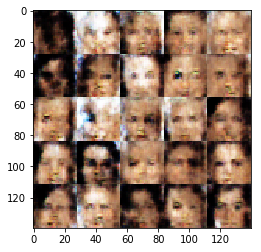

Epoch 1/1 batch 3100... Discriminator Loss: 1.0629... Generator Loss: 1.6003
Epoch 1/1 batch 3200... Discriminator Loss: 0.8938... Generator Loss: 1.9871
Epoch 1/1 batch 3300... Discriminator Loss: 1.0930... Generator Loss: 1.4524


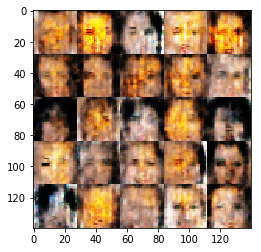

Epoch 1/1 batch 3400... Discriminator Loss: 1.1164... Generator Loss: 0.9276
Epoch 1/1 batch 3500... Discriminator Loss: 1.2574... Generator Loss: 1.8669
Epoch 1/1 batch 3600... Discriminator Loss: 1.3981... Generator Loss: 0.8272


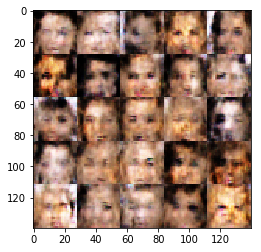

Epoch 1/1 batch 3700... Discriminator Loss: 1.0418... Generator Loss: 1.2963
Epoch 1/1 batch 3800... Discriminator Loss: 1.2666... Generator Loss: 1.2405
Epoch 1/1 batch 3900... Discriminator Loss: 1.3156... Generator Loss: 1.2266


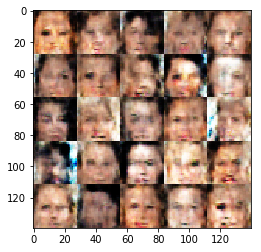

Epoch 1/1 batch 4000... Discriminator Loss: 1.1282... Generator Loss: 1.5843
Epoch 1/1 batch 4100... Discriminator Loss: 0.8413... Generator Loss: 1.7734
Epoch 1/1 batch 4200... Discriminator Loss: 1.0333... Generator Loss: 0.8917


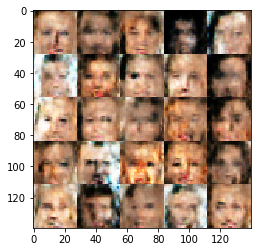

Epoch 1/1 batch 4300... Discriminator Loss: 1.3378... Generator Loss: 1.8736
Epoch 1/1 batch 4400... Discriminator Loss: 1.2367... Generator Loss: 1.4415
Epoch 1/1 batch 4500... Discriminator Loss: 1.0997... Generator Loss: 1.7767


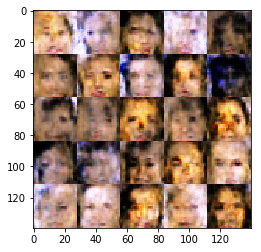

Epoch 1/1 batch 4600... Discriminator Loss: 0.9240... Generator Loss: 1.1131
Epoch 1/1 batch 4700... Discriminator Loss: 1.1835... Generator Loss: 1.3177
Epoch 1/1 batch 4800... Discriminator Loss: 1.5559... Generator Loss: 0.5987


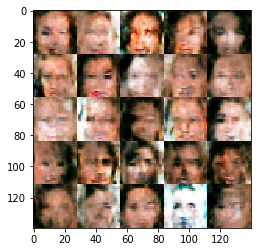

Epoch 1/1 batch 4900... Discriminator Loss: 1.0664... Generator Loss: 0.9082
Epoch 1/1 batch 5000... Discriminator Loss: 0.7866... Generator Loss: 1.7456
Epoch 1/1 batch 5100... Discriminator Loss: 0.9802... Generator Loss: 1.1432


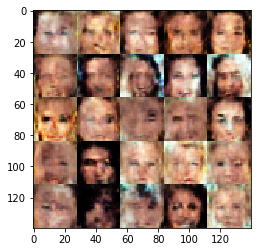

Epoch 1/1 batch 5200... Discriminator Loss: 1.0810... Generator Loss: 1.3512
Epoch 1/1 batch 5300... Discriminator Loss: 0.9634... Generator Loss: 1.9751
Epoch 1/1 batch 5400... Discriminator Loss: 1.2797... Generator Loss: 1.4013


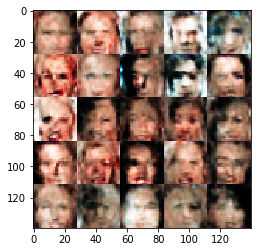

Epoch 1/1 batch 5500... Discriminator Loss: 1.1024... Generator Loss: 2.5080
Epoch 1/1 batch 5600... Discriminator Loss: 1.0396... Generator Loss: 1.9018
Epoch 1/1 batch 5700... Discriminator Loss: 1.1410... Generator Loss: 1.3768


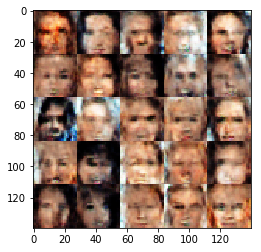

Epoch 1/1 batch 5800... Discriminator Loss: 1.1470... Generator Loss: 1.2147
Epoch 1/1 batch 5900... Discriminator Loss: 1.1510... Generator Loss: 1.6030
Epoch 1/1 batch 6000... Discriminator Loss: 1.0144... Generator Loss: 1.2925


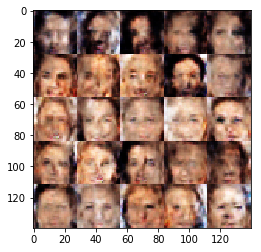

Epoch 1/1 batch 6100... Discriminator Loss: 1.6200... Generator Loss: 2.2888
Epoch 1/1 batch 6200... Discriminator Loss: 0.8851... Generator Loss: 1.0940
Epoch 1/1 batch 6300... Discriminator Loss: 1.1740... Generator Loss: 2.6275


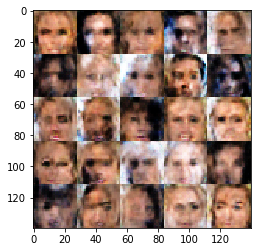

In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。